# Exploratory Data Analysis

Let's run Exploratory Data Analysis on the [Penguins dataset](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data). The goal of this notebook is to understand the data and the problem we are trying to solve.

Let's start by loading the Penguins dataset and taking a look at the first few rows.

You'll see that the dataset contains the following columns:

1. `species`: The species of a penguin. This is the column we want to predict.
2. `island`: The island where the penguin was found
3. `culmen_length_mm`: The length of the penguin's culmen (bill) in millimeters
4. `culmen_depth_mm`: The depth of the penguin's culmen in millimeters
5. `flipper_length_mm`: The length of the penguin's flipper in millimeters
6. `body_mass_g`: The body mass of the penguin in grams
7. `sex`: The sex of the penguin

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

DATASET = Path("../data/penguins.csv")

penguins = pd.read_csv(DATASET)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Now, let's get the summary statistics for the features in our dataset.


In [2]:
penguins.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Let's now display the distribution of values for the three categorical columns in our data:

-   `species`: There are 3 species of penguins in the dataset: Adelie (with `152` samples), Gentoo (with `124` samples), and Chinstrap (with `68` samples).
-   `island`: Penguins come from 3 islands: Biscoe (`168` samples), Dream (`124` samples), and Torgersen (`52` samples).
-   `sex`: We have `168` male penguins, `165` female penguins, and `1` penguin with an ambiguous gender (`.`). We'll need to fix this later.


In [3]:
species_distribution = penguins["species"].value_counts()
island_distribution = penguins["island"].value_counts()
sex_distribution = penguins["sex"].value_counts()

print(species_distribution, end="\n\n")
print(island_distribution, end="\n\n")
print(sex_distribution)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64




Let's replace the ambiguous value in the `sex` column with a `null` value:


In [4]:
penguins["sex"] = penguins["sex"].replace(".", np.nan)

# Let's display the new distribution of the column:
sex_distribution = penguins["sex"].value_counts()
sex_distribution

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

Next, let's check for any missing values in the dataset.


In [5]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Let's get rid of the missing values. For now, we are going to replace the missing values with the most frequent value in the column. Later, we'll use a different strategy to replace missing numeric values.


In [6]:
# Assignment 3: Extend the Exploratory Data Analysis notebook by: 
# calculating the percentage of missing values for each column, 
# analyzing patterns in missing data
# investigating correlations between missing values.

# Calculate percentage of missing values
missing_percentage = penguins.isna().mean() * 100
missing_percentage

# Display missing value percentages
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# correlations between missing values
missing_corr = penguins.isna().corr()
missing_corr


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.420753
culmen_depth_mm,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.420753
flipper_length_mm,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.420753
body_mass_g,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.420753
sex,NaN,NaN,0.420753,0.420753,0.420753,0.420753,1.000000


In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent") #other strats: mean, median, constant
penguins.iloc[:, :] = imputer.fit_transform(penguins)

# Let's display again the number of missing values:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
penguins.iloc[:, :]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Let's visualize the distribution of categorical features.


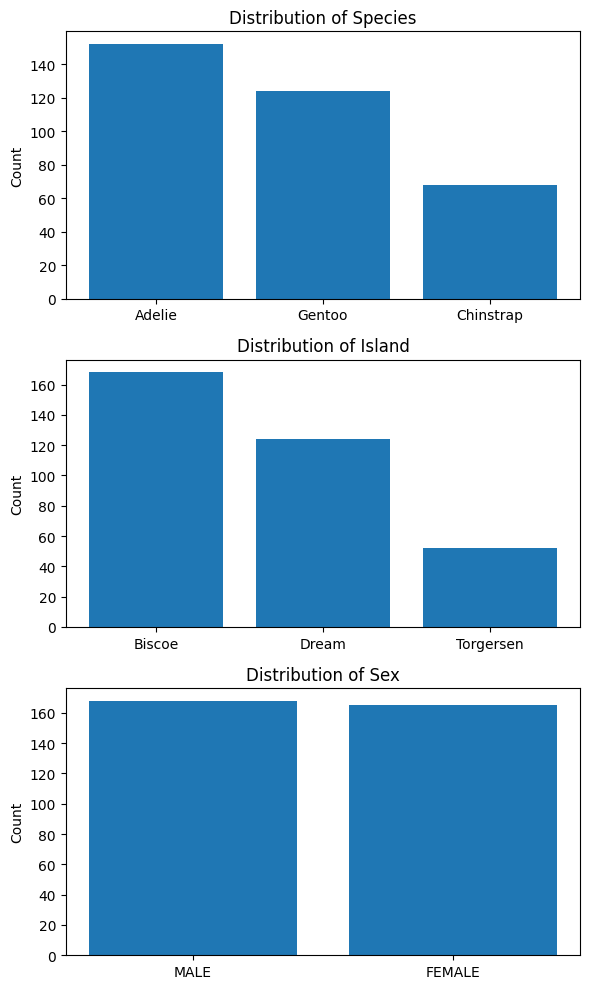

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].bar(species_distribution.index, species_distribution.values)
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Species")

axs[1].bar(island_distribution.index, island_distribution.values)
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Island")

axs[2].bar(sex_distribution.index, sex_distribution.values)
axs[2].set_ylabel("Count")
axs[2].set_title("Distribution of Sex")

plt.tight_layout()
plt.show()

Let's visualize the distribution of numerical columns.


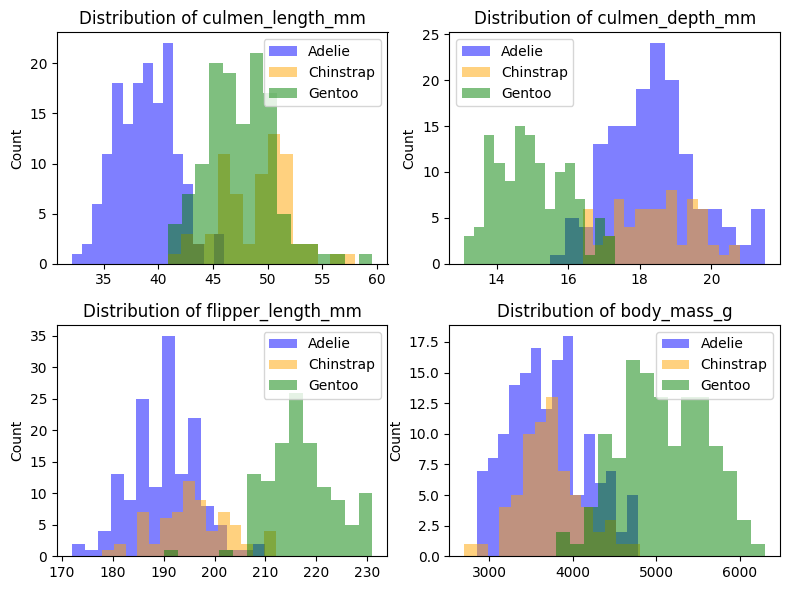

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
bin_size = 15

# compare distributions between different species
species = penguins["species"].unique()
colors = ["blue", "orange", "green"]

for i, sp in enumerate(species):
    axs[0, 0].hist(penguins[penguins["species"] == sp]["culmen_length_mm"], bins=bin_size, alpha=0.5, color=colors[i], label=sp)
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_title("Distribution of culmen_length_mm")
axs[0, 0].legend()

for i, sp in enumerate(species):
    axs[0, 1].hist(penguins[penguins["species"] == sp]["culmen_depth_mm"], bins=bin_size, alpha=0.5, color=colors[i], label=sp)
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_title("Distribution of culmen_depth_mm")
axs[0, 1].legend()

for i, sp in enumerate(species):
    axs[1, 0].hist(penguins[penguins["species"] == sp]["flipper_length_mm"], bins=bin_size, alpha=0.5, color=colors[i], label=sp)
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_title("Distribution of flipper_length_mm")
axs[1, 0].legend()

for i, sp in enumerate(species):
    axs[1, 1].hist(penguins[penguins["species"] == sp]["body_mass_g"], bins=bin_size, alpha=0.5, color=colors[i], label=sp)
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_title("Distribution of body_mass_g")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

MALE color is lightblue and FEMALE color is pink


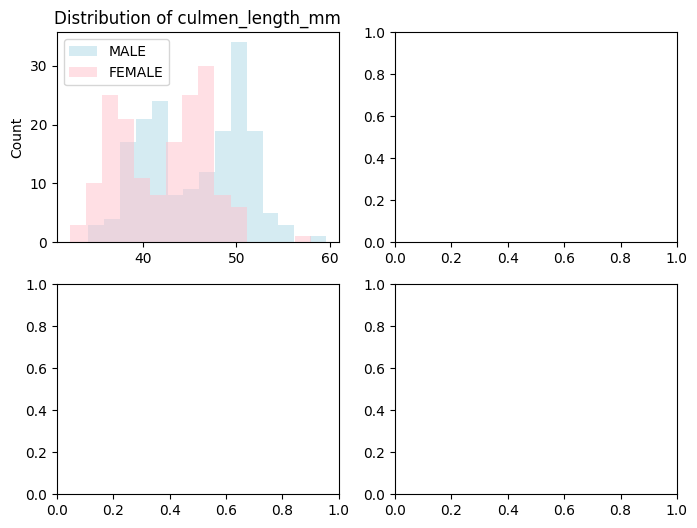

In [11]:
# Assignment 4
# Show distributions by sex
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
bin_size = 15
# --- IGNORE ---
sexes = penguins["sex"].unique()
colors = ["lightblue", "pink"]
print(f"{sexes[0]} color is {colors[0]} and {sexes[1]} color is {colors[1]}")

for i, sx in enumerate(sexes):
    axs[0,0].hist(penguins[penguins["sex"] == sx]["culmen_length_mm"], bins=bin_size, alpha=0.5, color=colors[i], label=sx)
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_title("Distribution of culmen_length_mm")
axs[0, 0].legend()

Let's display the covariance matrix of the dataset. The "covariance" measures how changes in one variable are associated with changes in a second variable. In other words, the covariance measures the degree to which two variables are linearly associated.

Here are three examples of what we get from interpreting the covariance matrix below:

1. The positive covariance of 50.26 between culmen length and flippler length suggests that larger values of culmen length are associated with larger values of flipper length. As one increases, generally so does the other.
2. The positive covariance of 2596.97 between culmen length and body mass suggests that heavier penguins generally have longer culmens. There is a tendency for these two variables to increase together.
3. The negative covariance of -742.66 between culmen depth and body mass suggests a general tendency that penguins with deeper culmens weigh less.


In [12]:
penguins.cov(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.679415,-2.516984,50.260588,2596.971151
culmen_depth_mm,-2.516984,3.877201,-16.108849,-742.660180
flipper_length_mm,50.260588,-16.108849,197.269501,9792.552037
body_mass_g,2596.971151,-742.660180,9792.552037,640316.716388


Let's now display the correlation matrix. "Correlation" measures both the strength and direction of the linear relationship between two variables:

Here are three examples of what we get from interpreting the correlation matrix below:

1. Penguins that weight more tend to have longer flippers.
2. Penguins with a shallower culmen tend to have longer flippers.
3. Penguins with longer culmens tend to have longer flippers.


In [13]:
penguins.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.234635,0.656856,0.595720
culmen_depth_mm,-0.234635,1.000000,-0.582472,-0.471339
flipper_length_mm,0.656856,-0.582472,1.000000,0.871302
body_mass_g,0.595720,-0.471339,0.871302,1.000000


Let's display the distribution of species by island:


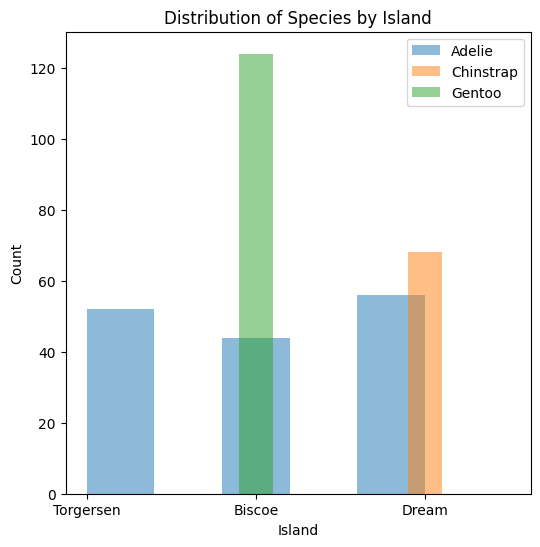

In [14]:
unique_species = penguins["species"].unique()

fig, ax = plt.subplots(figsize=(6, 6))
for species in unique_species:
    data = penguins[penguins["species"] == species]
    ax.hist(data["island"], bins=5, alpha=0.5, label=species)

ax.set_xlabel("Island")
ax.set_ylabel("Count")
ax.set_title("Distribution of Species by Island")
ax.legend()
plt.show()

Let's display the distribution of species by sex.


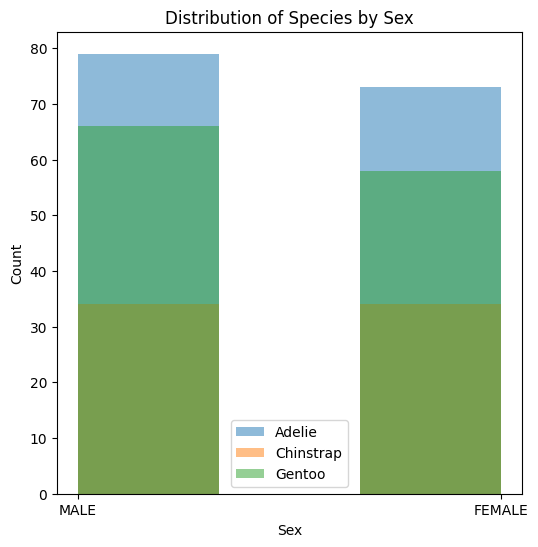

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))

for species in unique_species:
    data = penguins[penguins["species"] == species]
    ax.hist(data["sex"], bins=3, alpha=0.5, label=species)

ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Distribution of Species by Sex")

ax.legend()
plt.show()

Size of data for culmen_length_mm: [152, 68, 124]
Size of data for culmen_depth_mm: [152, 68, 124]
Size of data for flipper_length_mm: [152, 68, 124]
Size of data for body_mass_g: [152, 68, 124]


/tmp/ipykernel_907/3333518140.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(data_by_species, labels=species_list)
/tmp/ipykernel_907/3333518140.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(data_by_species, labels=species_list)
/tmp/ipykernel_907/3333518140.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(data_by_species, labels=species_list)
/tmp/ipykernel_907/3333518140.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs

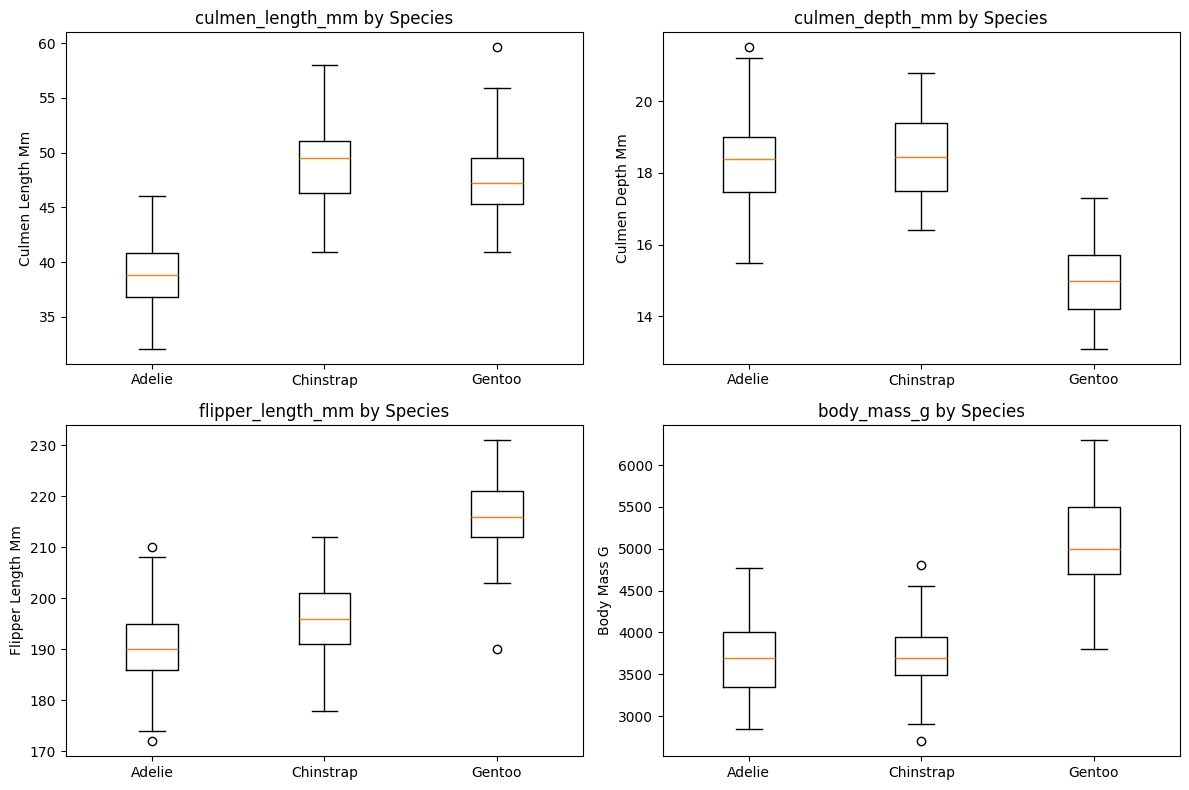

In [16]:
# Assignment 5

# Boxplots grouped by species
numerical_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
species_list = penguins["species"].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for idx, col in enumerate(numerical_cols):
    data_by_species = [penguins[penguins["species"] == sp][col] for sp in species_list]
    # print size of data_by_species
    print(f"Size of data for {col}: {[len(data) for data in data_by_species]}")
    axs[idx].boxplot(data_by_species, labels=species_list)
    axs[idx].set_title(f"{col} by Species")
    axs[idx].set_ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

In [18]:
# Assignment 6
numerical_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
species_list = penguins["species"].unique()

for idx, col in enumerate(numerical_cols):
    data_by_species = [penguins[penguins["species"] == sp][col] for sp in species_list]
    print([data.mean() for data in data_by_species])


[np.float64(38.80657894736842), np.float64(48.83382352941177), np.float64(47.45322580645161)]
[np.float64(18.3375), np.float64(18.42058823529412), np.float64(14.998387096774193)]
[np.float64(189.95394736842104), np.float64(195.8235294117647), np.float64(216.96774193548387)]
[np.float64(3701.315789473684), np.float64(3733.0882352941176), np.float64(5065.725806451613)]
